# Build a spaCy Processing Pipeline

# Exercise #1 : Load spaCy library

In [9]:
# Import library
import pandas as pd
import spacy
# from google.colab import drive
import matplotlib.pyplot as plt

Kalau di pc belum ada library ini, maka cara instalnya sebagai berikut:

Install spaCy

**!pip install spacy**

Download the English langugage model for spaCy

**!python -m spacy download en_core_web_sm**

In [10]:
# Load model english langugage
nlp = spacy.load("en_core_web_sm") #Here, spacy.load, loads the English model and assigns it to variable nlp

#When you execute nlp = spacy.load('en'), spaCy downloads and loads the pre-trained English language model
#into memory and assigns it to the variable nlp.
#This pre-trained model contains information about word vectors, part-of-speech tags, syntactic dependencies,
#and other linguistic features necessary for various NLP tasks.

# Exercise #2 : Build a simple processing pipeline

In [11]:
# Example text
text = "A customer in New York City wants to give a review."

# Process the text using spaCy
doc = nlp(text)

# The nlp object is typically a loaded spaCy language model,
# such as the English language model ('en') you loaded. When you pass
# the text string to the nlp object, spaCy processes the text
# through its NLP pipeline.

# After executing doc = nlp(text), the variable doc contains a
# spaCy Doc object, which represents the processed version of the input text.

In [12]:
# Tokenization
print("Tokenization:")
for token in doc:
    print(token.text)

Tokenization:
A
customer
in
New
York
City
wants
to
give
a
review
.


In [13]:
# Filter out stop words
print("Filtered Tokens (without stop words):")
# filtered_tokens = []  # Inisialisasi list kosong untuk menyimpan token yang difilter

# for token in doc:  # Loop melalui setiap token dalam dokumen (doc)
#     if not token.is_stop:  # Periksa apakah token BUKAN stop word menggunakan fungsi .is_stop
#         filtered_tokens.append(token.text)  # Jika bukan stop word, tambahkan teks token ke list

#Stop words adalah kata-kata umum dalam suatu bahasa yang sering muncul dalam teks
#tetapi dianggap memiliki sedikit nilai informasi untuk analisis teks.

filtered_tokens = [token.text for token in doc if not token.is_stop]
print(filtered_tokens)

Filtered Tokens (without stop words):
['customer', 'New', 'York', 'City', 'wants', 'review', '.']


In [14]:
# Part-of-Speech Tagging (POS)
print("Part-of-Speech Tagging (POS):")
for token in doc:
    print(token.text, token.pos_)

#Part-of-Speech Tagging (POS Tagging) adalah proses pemberian label (tag) pada setiap
#kata dalam suatu teks untuk menunjukkan kelas kata atau peran gramatikalnya dalam kalimat.

Part-of-Speech Tagging (POS):
A DET
customer NOUN
in ADP
New PROPN
York PROPN
City PROPN
wants VERB
to PART
give VERB
a DET
review NOUN
. PUNCT


In [15]:
# Named Entity Recognition (NER)
print("Named Entity Recognition (NER):")
for ent in doc.ents:
  # Iterate through each named entity in the processed text and print its text and label
  print(ent.text, ent.label_)

#Named Entity Recognition (NER) adalah tugas dalam pemrosesan bahasa alami (NLP) yang bertujuan
#untuk mengidentifikasi dan mengklasifikasikan entitas bernama dalam teks
#ke dalam kategori yang telah ditentukan sebelumnya.

Named Entity Recognition (NER):
New York City GPE


In [16]:
# Lemmatization
print("Lemmatization:")
# lemmatized_tokens = []  # Inisialisasi list kosong untuk menyimpan token yang dilemmatized

# for token in doc:  # Loop melalui setiap token dalam dokumen (doc)
#     if not token.is_punct:  # Periksa apakah token BUKAN tanda baca menggunakan fungsi .is_punct
#         lemmatized_tokens.append(token.lemma_)  # Jika bukan punct, tambahkan teks token ke list

lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct]
# Create a list of lemmatized tokens excluding punctuation using list comprehension
print(lemmatized_tokens)

#Lemmatization adalah proses dalam NLP yang bertujuan untuk mereduksi
#sebuah kata ke bentuk dasarnya (lemma).
#Lemma adalah bentuk dasar dari sebuah kata yang dapat ditemukan dalam kamus.
#Dalam contoh kode ini kita hanya menghapus PUNCT atau tanda baca (.)

Lemmatization:
['a', 'customer', 'in', 'New', 'York', 'City', 'want', 'to', 'give', 'a', 'review']


**Kesemipulan :**
Dengan menggunakan library spacy kita dapat mengolah kalimat dalam bebrapa metode.

**Dengann cara :**
Tokenization, Filter out stop words, Part-of-Speech Tagging (POS), Named Entity Recognition (NER), Lemmatization.

# Exercise #3 : Build a Processing Pipeline with a File

## Open file txt in google drive

In [17]:

# # Mount Google Drive
# drive.mount('/content/drive')

# # Specify the file path in your Google Drive
# file_path = '/content/drive/My Drive/dev/linked-learning/advance-your-skills-in-nlp/course-1/part-1/sentiment_examples.txt'

# try:
#     with open(file_path, 'r') as file:
#         sentiment_texts = file.readlines()
# except FileNotFoundError:
#     print(f"Error: File not found at {file_path}")
#     exit()

file_path = 'sentiment_examples.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    sentiment_texts = file.readlines()


## Processing Pipeline

In [18]:
token_lists = []
filtered_token_lists = []
post_tag_lists = []
ner_lists = []

for sentiment_text in sentiment_texts:
  doc = nlp(sentiment_text.strip())

  # Tokenization
  tokens = [token.text for token in doc]  # Extract tokens from the processed text
  token_lists.append(tokens)  # Append tokens list to token_lists
  #Creates a list of tokens and appending it to the token_lists list.
  #This is done to store the tokens for each sentiment example.

  # Stop word removal filter
  filtered_tokens = [token.text for token in doc if not token.is_stop]
  filtered_token_lists.append(filtered_tokens)
  #Creates a list of filtered tokens and appending it to the filter_token_lists list.

  # Part-of-speech Tagging (POS tagging)
  post_tag = [(token.text, token.pos_) for token in doc]
  post_tag_lists.append(post_tag)
  #Creates a list of POS tags and appending it to the post_tag_lists list.

  # Named entity recognition (NER)
  ner_entity = [(ent.text, ent.label_) for ent in doc.ents]
  ner_lists.append(ner_entity)
  #Creates a list of named entities and appending it to the ner_lists list.



In [19]:
results_df = pd.DataFrame({
    'Sentiment Example': sentiment_texts,
    'Tokens': token_lists,
    'Filtered Tokens': filtered_token_lists,
    'POS Tags':  post_tag_lists,
    'Named Entities': ner_lists
})

# Display the DataFrame
print(results_df)

                                   Sentiment Example  \
0  "I love the new features of your product! It h...   
1  "The customer support was exceptional in New Y...   
2  "The quality of your service exceeded my expec...   
3  "I'm extremely satisfied with my purchase. The...   
4  "The user interface is intuitive and easy to n...   
5  "I had a positive experience shopping on your ...   
6  "Your company values customer feedback, and it...   
7  "The pricing is fair, and the value I get in r...   
8  "I appreciate the personalized recommendations...   
9  "The delivery was prompt, and the packaging wa...   

                                              Tokens  \
0  [", I, love, the, new, features, of, your, pro...   
1  [", The, customer, support, was, exceptional, ...   
2  [", The, quality, of, your, service, exceeded,...   
3  [", I, 'm, extremely, satisfied, with, my, pur...   
4  [", The, user, interface, is, intuitive, and, ...   
5  [", I, had, a, positive, experience, shoppin

## Export Data to CSV to see the processed_data.csv

In [21]:
# Write the DataFrame to a CSV file named 'processed_data.csv' without including the index
results_df.to_csv('processed_data.csv', index=False)

# Read the CSV file 'processed_data.csv' into a Pandas DataFrame called processed_df
# Specify the encoding as 'latin-1' to handle special characters if present
processed_df = pd.read_csv('processed_data.csv', encoding='latin-1')

In [ ]:
processed_df.head()

,Sentiment Example,Tokens,Filtered Tokens,POS Tags,Named Entities
0,"""I love the new features of your product! It h...","['""', 'I', 'love', 'the', 'new', 'features', '...","['""', 'love', 'new', 'features', 'product', '!...","[('""', 'PUNCT'), ('I', 'PRON'), ('love', 'VERB...",[]
1,"""The customer support was exceptional in New Y...","['""', 'The', 'customer', 'support', 'was', 'ex...","['""', 'customer', 'support', 'exceptional', 'N...","[('""', 'PUNCT'), ('The', 'DET'), ('customer', ...","[('New York', 'GPE')]"
2,"""The quality of your service exceeded my expec...","['""', 'The', 'quality', 'of', 'your', 'service...","['""', 'quality', 'service', 'exceeded', 'expec...","[('""', 'PUNCT'), ('The', 'DET'), ('quality', '...","[('Prague', 'GPE')]"
3,"""I'm extremely satisfied with my purchase. The...","['""', 'I', ""'m"", 'extremely', 'satisfied', 'wi...","['""', 'extremely', 'satisfied', 'purchase', '....","[('""', 'PUNCT'), ('I', 'PRON'), (""'m"", 'AUX'),...",[]
4,"""The user interface is intuitive and easy to n...","['""', 'The', 'user', 'interface', 'is', 'intui...","['""', 'user', 'interface', 'intuitive', 'easy'...","[('""', 'PUNCT'), ('The', 'DET'), ('user', 'NOU...",[]


# Exercise #4 : Calculate the count of tokens for each sentiment.

## Create wordcloud

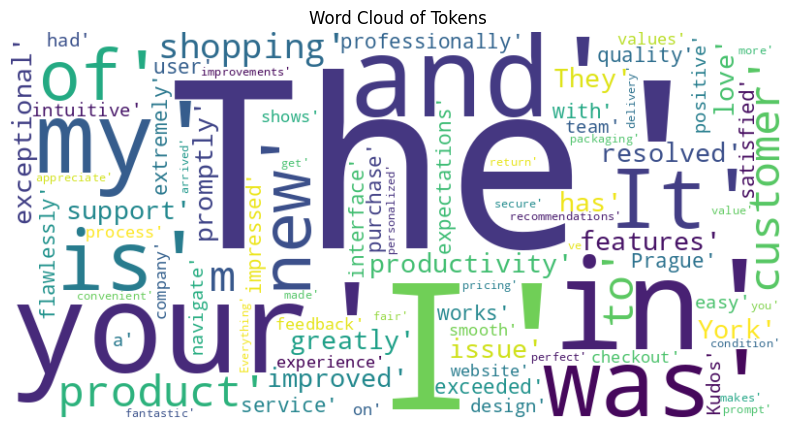

In [ ]:
from wordcloud import WordCloud

# Combine all tokens into a single text
all_tokens = ' '.join(processed_df['Tokens'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud of Tokens')
plt.show()

## Token Count

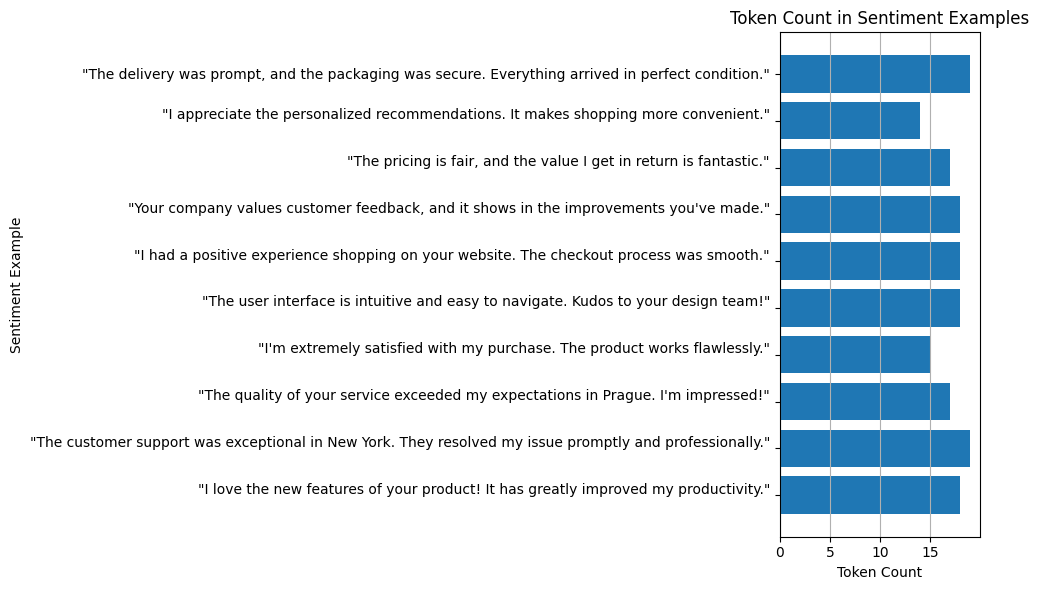

In [ ]:
# Load the processed data from the CSV file
file_path = '/content/processed_data.csv'  # Update with the path to your processed data CSV file
processed_data = pd.read_csv(file_path)

# Calculate the count of tokens for each sentiment example
token_counts = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(processed_data['Sentiment Example'], token_counts)  # Horizontal bar chart
plt.xlabel('Token Count')  # X-axis label
plt.ylabel('Sentiment Example')  # Y-axis label
plt.title('Token Count in Sentiment Examples')  # Chart title
plt.grid(axis='x')  # Show grid lines on the x-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

## Histogram of Token Lengths
Visualize the distribution of token lengths in the sentiment examples. This can give insights into the length of words used in the text.

<ipython-input-42-93c887bf4680>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping labels


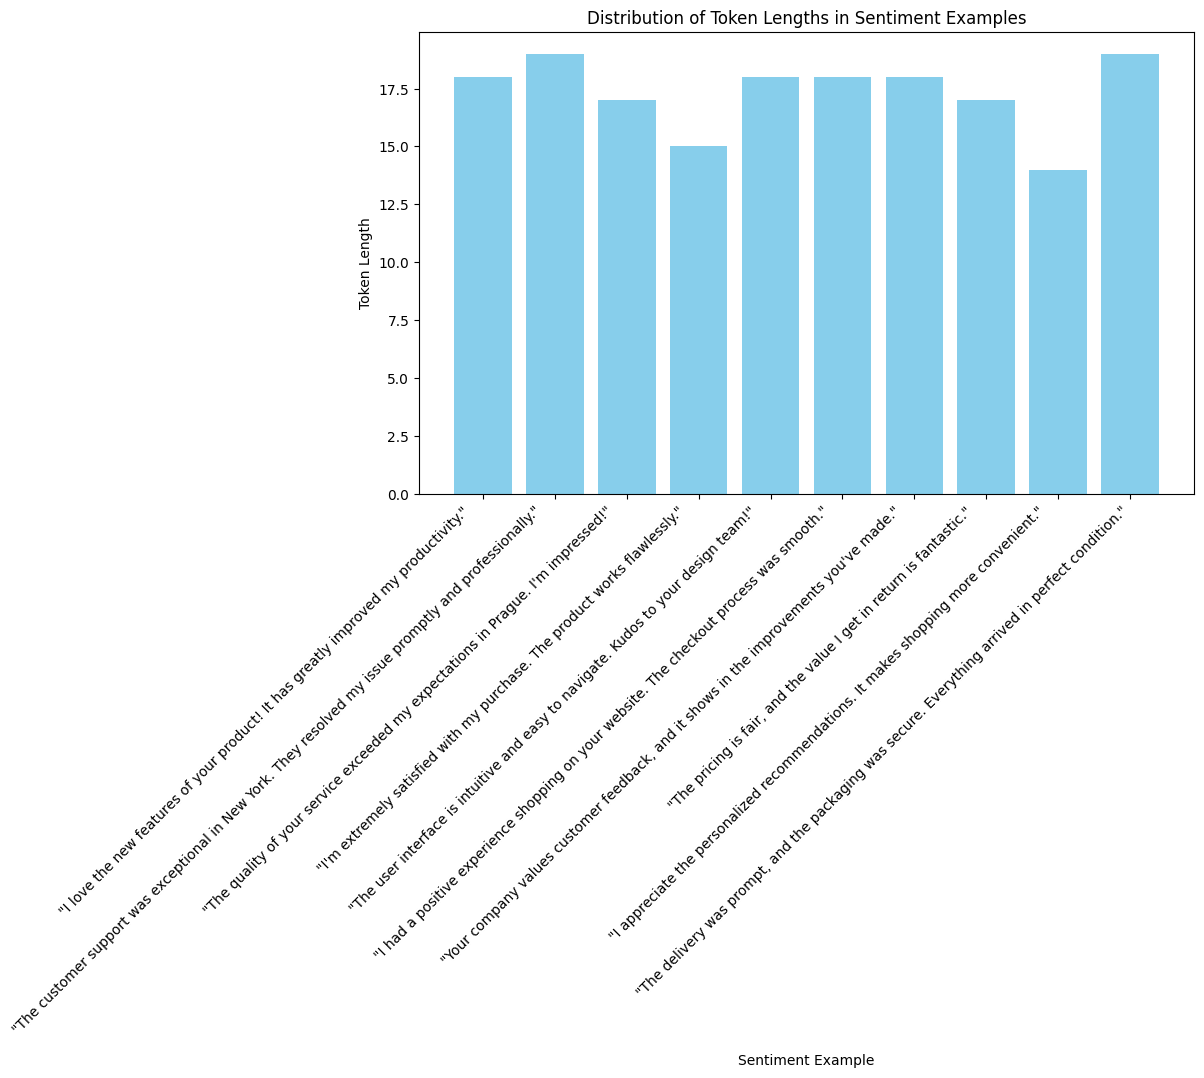

In [ ]:
# Load the processed data from the CSV file
file_path = 'processed_data.csv'  # Update with the path to your processed data CSV file
processed_data = pd.read_csv(file_path)

# Calculate token lengths for each sentiment example
processed_data['Token Length'] = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart to visualize token lengths
plt.figure(figsize=(10, 6))
plt.bar(processed_data['Sentiment Example'], processed_data['Token Length'], color='skyblue')
plt.xlabel('Sentiment Example')
plt.ylabel('Token Length')
plt.title('Distribution of Token Lengths in Sentiment Examples')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

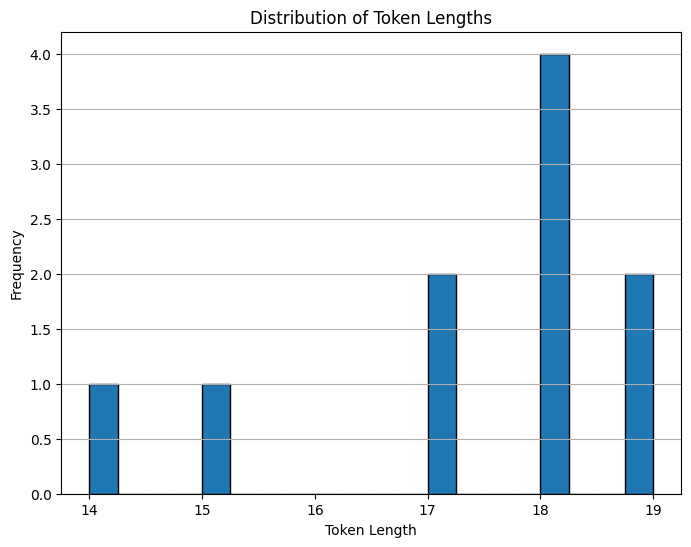

In [ ]:
# Calculate token lengths
token_lengths = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(token_lengths, bins=20, edgecolor='black')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths')
plt.grid(axis='y')
plt.show()